### The purpose of this project is to build a classification model on top of the Breast Cancer Wisconsin (Diagnostic) Data Set, trying to predict the Diagnosis (M = malignant, B = benign); meanwhile comparing different modeling approaches to land on a pontential most suitable method to deal with this type of data.


### Dataset Information

Breast Cancer Wisconsin (Diagnostic) Data Set from Kaggle.com

The features from the data set describe characteristics of the cell nuclei and are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. As described in UCI Machine Learning Repository, the attribute informations are:

ID number

Diagnosis (M = malignant, B = benign)

3 - 32 Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

### The questions we try to answer in this project:

1. Since we have so many features in the dataset, can you tell if any of them are particular important over the rest regarding predictive power?

2. For so many features, are all of them independent/potentially useful? Can some of the more or less represented by another so that we can at least reduce some dimensions?

3. Which modeling method you think fits this job? Try it out!

4. Other than the very common approach of taking in so many available features into modeling, be creative and try some other way to reduce the dimensions so that maybe we can land on a better model!

In [1]:
# Import the libraries for preparation work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data and check out a few lines
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Check the size
df.shape

(569, 33)

#### Looks like we only get 569 observations: quite a small dataset but with relatively a lot features/variables!

In [4]:
# Get all the column names for future references
# What info can you get from looking at the column names?
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

#### It looks like people will definitely need some domain knowledge to tell whether a feature is potentially useful or not, unfortunately I have none, so I have to assume potentially all features are useful features except for these two:

#### 1. 'id': I do not need domain knowledge to tell that this is just patient or case index, which does not need to go into the model

#### 2. 'Unnamed: 32': this looks like a weird feature. I need to dig further into it.

In [5]:
# Look at the descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#### We can get 2 things out of it:
#### 1. The Unnamed:32 is a totally empty column so it can be dropped
#### 2. The rest of the features do not have any missing values, which is good so we do have high quality data!

In [6]:
# Drop the unnecessary columns
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [7]:
# Doublecheck on the missing values
df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [8]:
# Now check the data type for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

#### So, all the features are numeric, except for the 'diagnosis' which is exactly the label we are trying to predict, meaning that we have no string features as predictive variables so we do not need to create any dummy variables. Very lucky!

In [9]:
# Let's still convert the string label feature into binary 0-1, just to make it look more like science.
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
df['diagnosis'].replace(['M','B'], [1,0], inplace=True)
df['diagnosis'].unique()

array([1, 0])

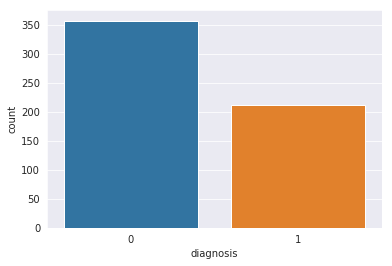

In [11]:
# Check how our data is distributed
sns.set_style('darkgrid')
sns.countplot(x='diagnosis', data=df)

#### Looks like the 0 and 1 are fairly distributed, so we don't need to worry much about the bias in the KPI of Accuracy when we finally evaluate the model performance later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


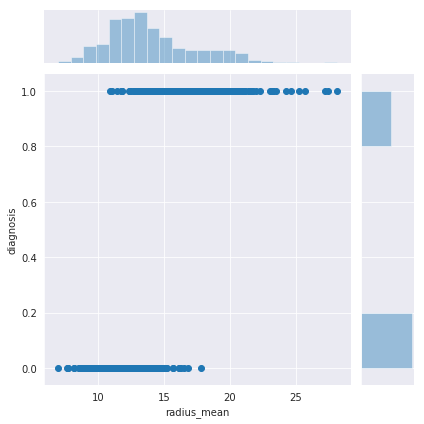

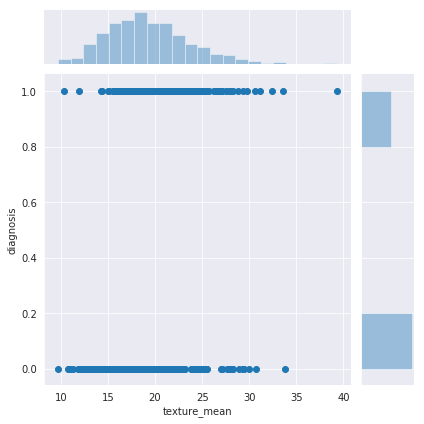

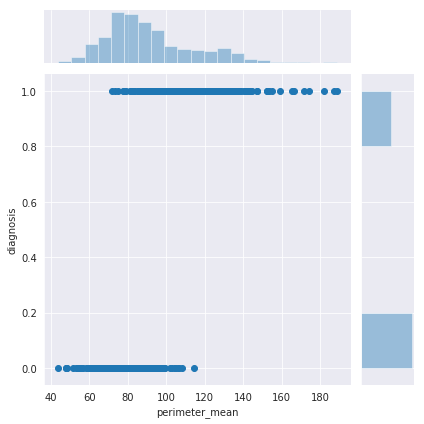

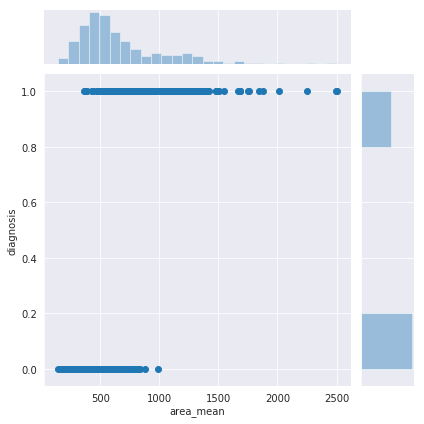

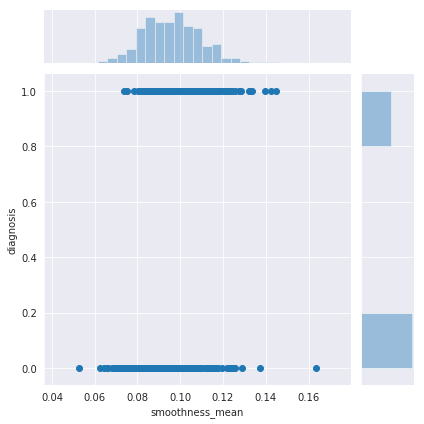

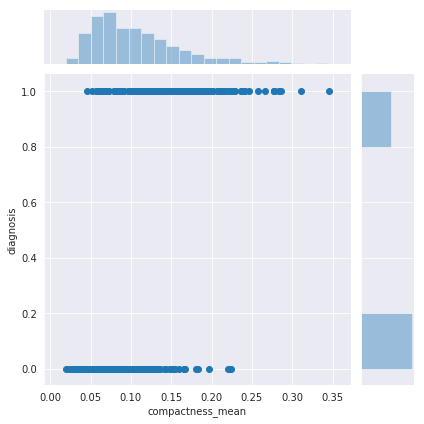

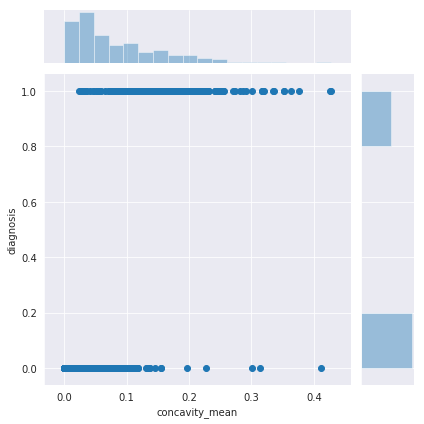

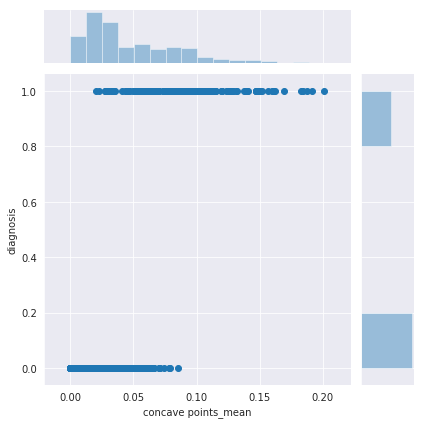

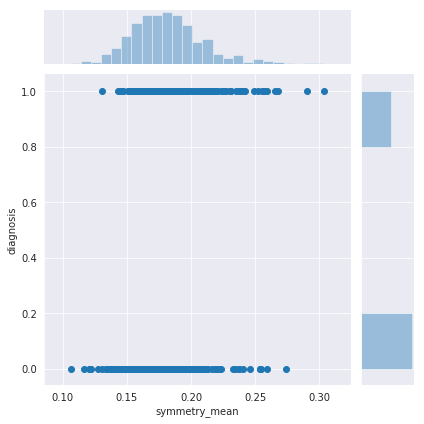

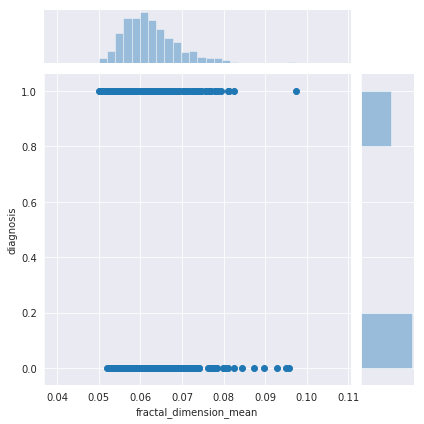

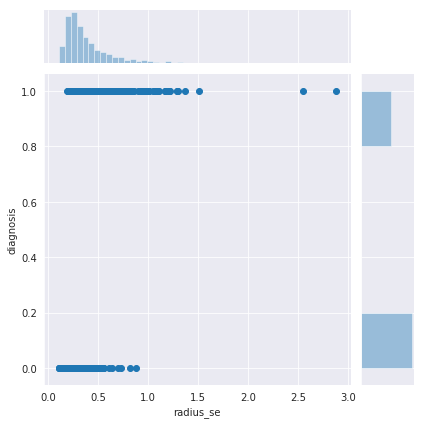

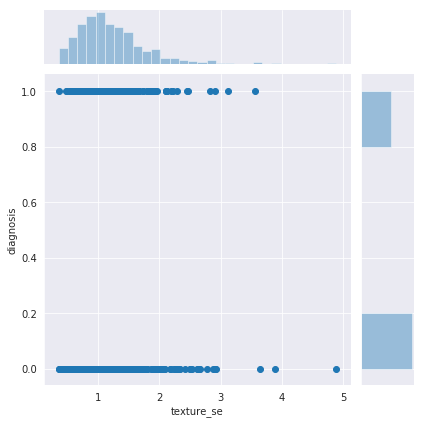

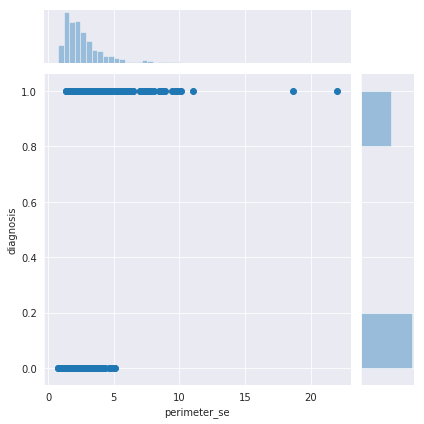

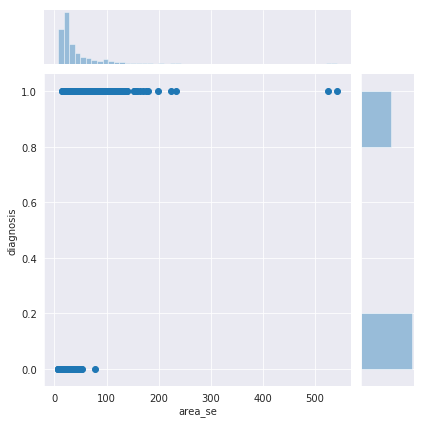

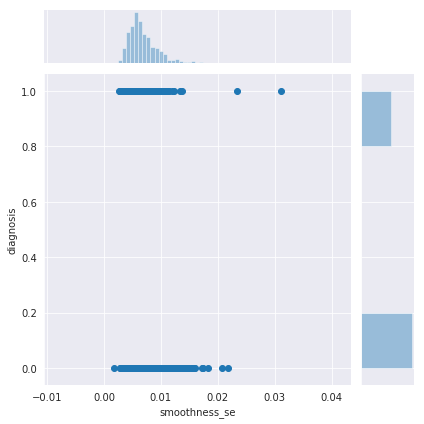

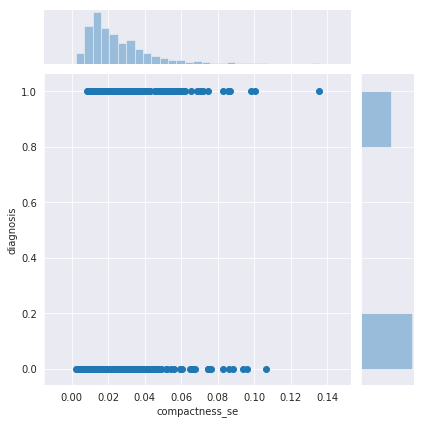

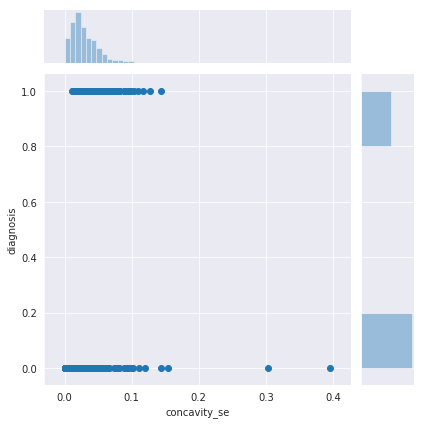

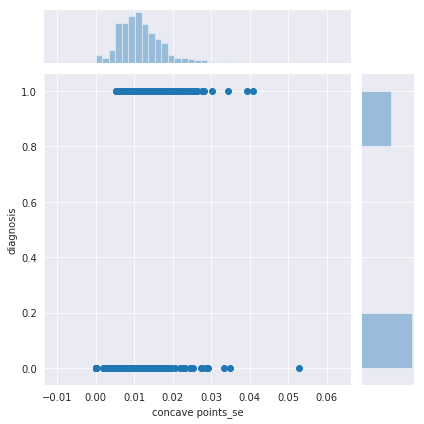

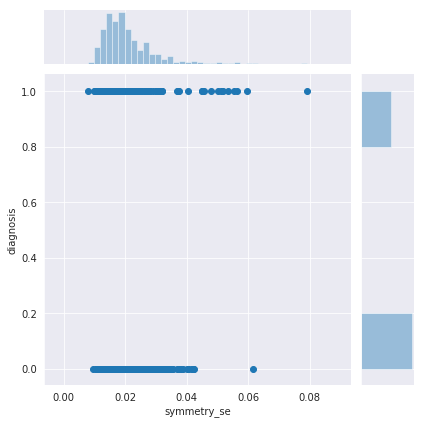

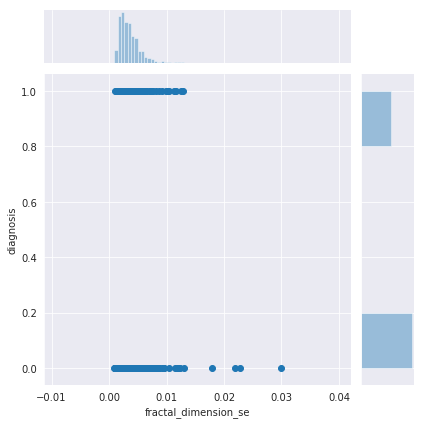

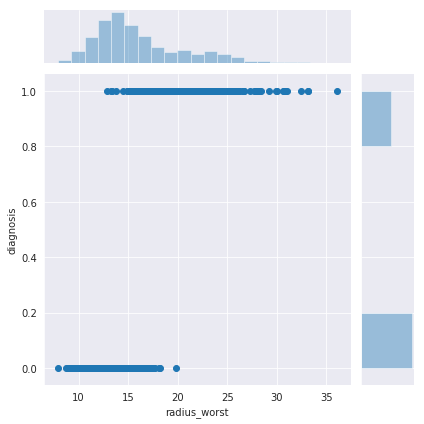

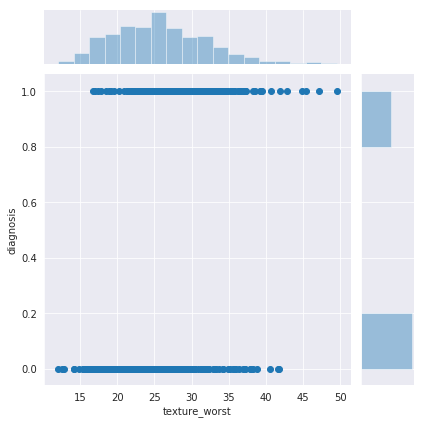

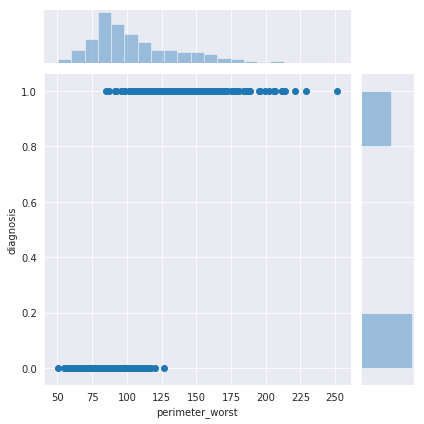

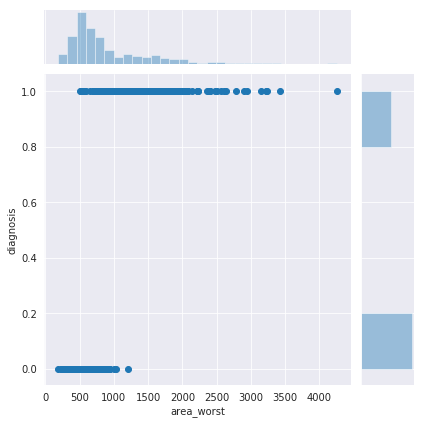

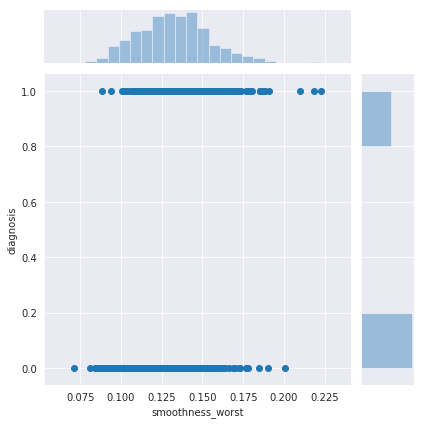

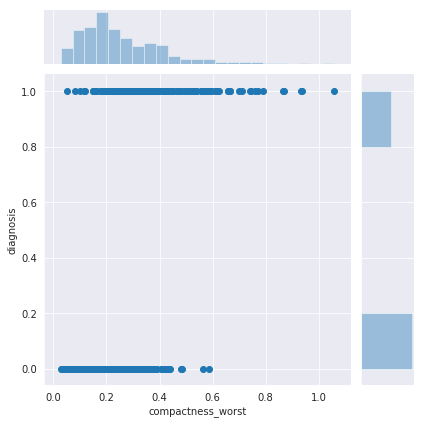

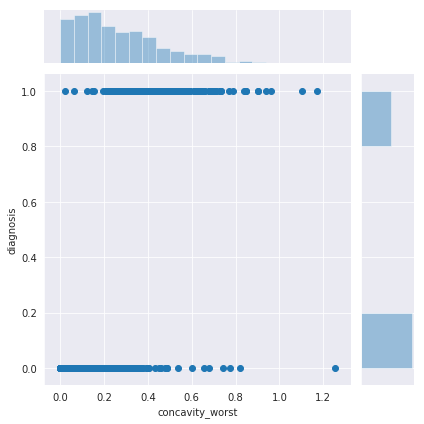

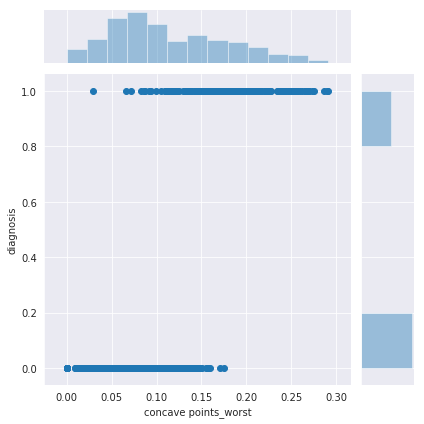

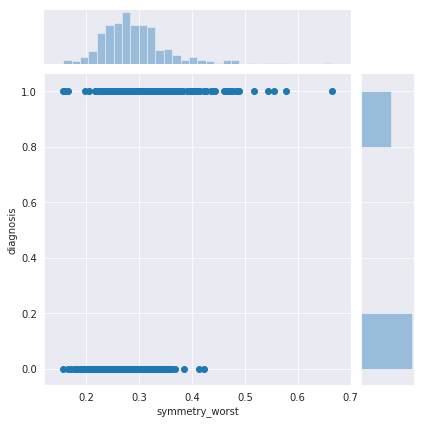

In [12]:
# Now let's try to answer the Question 1
'''
Since we have so many features in the dataset, 
can you tell if any of them are particular important over the rest regarding predictive power?
'''

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
for i in range(0, X.shape[1]-1):
    sns.jointplot(x = X.iloc[:,i], y=y)

#### From the graphs above we can generally say that radius_mean, perimeter_mean and area_mean are all important in predicting dianosis, because we can see that once the values in those 3 features exceed some certain threshold, almost all cases are positive. Similarly, there is also another threshold below which the case is very likely to be negative. This is the information we can roughly get from the data visualization.

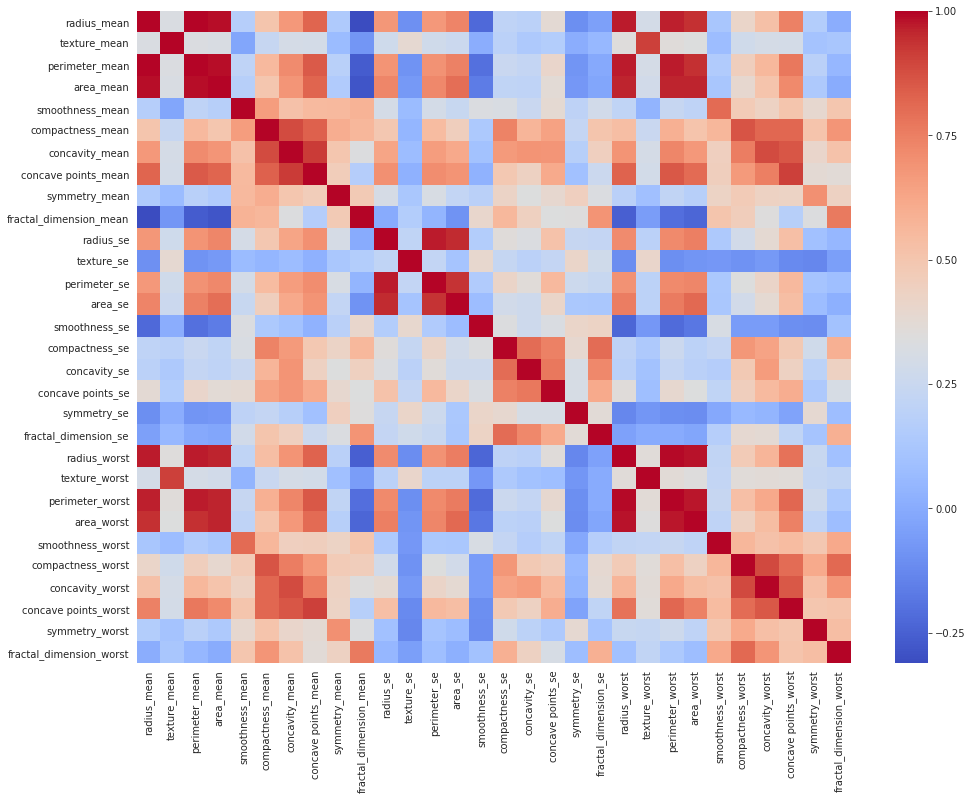

In [16]:
# Let's check out Question 2
'''
For so many features, are all of them independent/potentially useful?
Can some of the more or less represented by another so that we can at least reduce some dimensions?
'''

plt.figure(figsize=[16,12])
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')

#### From the graph above we can easily tell the radius, perimeter and area are highly correlated with each other; meanwhile, for the same factor, the _mean and _worst values are also highly correlated. All of these makes sense intuitively, because, imagine there is a big sized tumor, all aspects like radius, perimeter and area of it should be big as well. And the _worst certainly have impact on the _mean for each factor.

#### Usually once we found highly correlated variables, we like to keep only one of them and drop all the rest; however, due to lack of domain knowledge, I'm wary to just drop any information like this. I'd rather keep them all and let the machine decide how they play in the model. In the end, we just look at the evaluation metrics for model's performance.

In [17]:
# Now Question 3:
'''
Which modeling method you think fits this job? Try it out!

Logistic Regression is a must try for this type of problem because
the function can represent the probabilities between class 0 and 1;

The ensemble model of Random Forest is also worth a try, especially
under this circumstance that we do not have any domain knowledge 
about the features. The ML may be able to tell us something.

So we will try both Logistic Regression and Random Forest
'''

In [19]:
# Standardize the data first

'''
To prevent information leakage, the fitting process should only be applied to training dataset, 
and the test dataset should be transformed directly without touching the fitting.
So we need to split the dataset prior to standardizing it
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2, #because we have small dataset
                                                   )

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fitting + transforming
X_test = scaler.transform(X_test) # only transforming here

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
predictions1 = regressor.predict(X_test)

In [23]:
# Evaluate the performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions1), '\n', classification_report(y_test,predictions1))

[[71  0]
 [ 1 42]] 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



#### We got very good prediction performance as both precision and recall have very high scores! The Type 2 error rate and Type 1 error rate are close to minimum. Overall this model has very good performance.

In [28]:
# Random Forest
'''
We are gonna use GridSearch Cross Validation in conjunction with Random Forest
to decide the best number of estimators (trees in the forest)

Usually we tend to use square root of the number of features as the number of
estimators, but in this case we will try from 1 to 33 (equal to the number of features)

'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': list(range(1,34))}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=3)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.923, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.956, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.912, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.912, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ...................... n_estimators=1, score=0.934, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ...................... n_estimators=2, score=0.934, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... n_estimators=4, score=0.934, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ...................... n_estimators=5, score=0.967, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ...................... n_estimators=5, score=0.934, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ...................... n_estimators=5, score=0.923, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ...................... n_estimators=5, score=0.956, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ...................... n_estimators=5, score=0.923, total=   0.0s
[CV] n_estimators=6 ..................................................
[CV] ...................... n_estimators=6, score=0.945, total=   0.0s
[CV] n_estimators=6 ..................................................
[CV] .

[CV] ..................... n_estimators=16, score=0.934, total=   0.1s
[CV] n_estimators=17 .................................................
[CV] ..................... n_estimators=17, score=0.956, total=   0.1s
[CV] n_estimators=17 .................................................
[CV] ..................... n_estimators=17, score=0.978, total=   0.0s
[CV] n_estimators=17 .................................................
[CV] ..................... n_estimators=17, score=0.956, total=   0.0s
[CV] n_estimators=17 .................................................
[CV] ..................... n_estimators=17, score=0.934, total=   0.0s
[CV] n_estimators=17 .................................................
[CV] ..................... n_estimators=17, score=0.945, total=   0.0s
[CV] n_estimators=18 .................................................
[CV] ..................... n_estimators=18, score=0.945, total=   0.1s
[CV] n_estimators=18 .................................................
[CV] .

[CV] ..................... n_estimators=28, score=0.945, total=   0.1s
[CV] n_estimators=28 .................................................
[CV] ..................... n_estimators=28, score=0.978, total=   0.1s
[CV] n_estimators=28 .................................................
[CV] ..................... n_estimators=28, score=0.945, total=   0.1s
[CV] n_estimators=29 .................................................
[CV] ..................... n_estimators=29, score=0.956, total=   0.1s
[CV] n_estimators=29 .................................................
[CV] ..................... n_estimators=29, score=0.956, total=   0.1s
[CV] n_estimators=29 .................................................
[CV] ..................... n_estimators=29, score=0.934, total=   0.1s
[CV] n_estimators=29 .................................................
[CV] ..................... n_estimators=29, score=0.956, total=   0.1s
[CV] n_estimators=29 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    8.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [30]:
# Check out the best number of estimators the machine decided for us
grid.best_params_

{'n_estimators': 12}

In [31]:
predictions2 = grid.predict(X_test)

In [32]:
print(confusion_matrix(y_test,predictions2), '\n', classification_report(y_test,predictions2))

[[70  1]
 [ 4 39]] 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Overall, our Random Forest model also got very good performance, but it seems a little beated by the Logistic Regression. So, among these two, our winner in dealing with this type of data is the Logistic Regression model.

In [33]:
# Now comes the very last question:
'''
Other than the very common approach of taking in so many available features into modeling, 
be creative and try some other way to reduce the dimensions so that maybe we can land on a better model!

Because we do not have enough domain knowledge, there is no way we just remove any features to bring down
the number of dimensions. So we will use Priciple Component Analysis to try to transform the data into 
fewer dimensions. In PCA, all the info from all the features is still kept, but each of them contributes 
in different levels to the primary component, the secondary component...etc.
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # We only want to try 2 components because we want to finally plot it as X vs Y


In [34]:
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA.shape

(455, 2)

Text(0, 0.5, 'Second Principle Component')

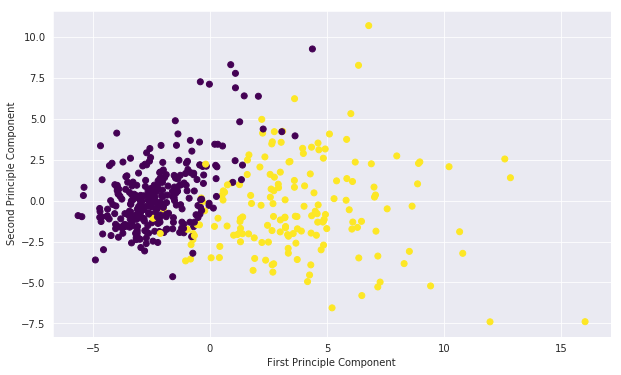

In [36]:
# Note that the number of dimensions has been brought down from 33 to 2
# Now plot it to see if it's become more straight forward for the model to predict

plt.figure(figsize=[10,6])
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1], c=y_train, cmap='viridis')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

#### The graph above is pretty self-explanatory. A Support Vectors Machines model is a goot fit to be used here to seperate those dots!

In [37]:
# Support Vectors Machines

from sklearn.svm import SVC
model = SVC()
model.fit(X_train_PCA, y_train)

X_test_PCA = pca.transform(X_test)
predictions3 = model.predict(X_test_PCA)

print(confusion_matrix(y_test,predictions3), '\n', classification_report(y_test,predictions3))

[[68  3]
 [ 6 37]] 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



#### Overall, it's also a good performance, but still cannot beat Logistic Regression. But keep in mind this dimensionality reduction technique may find it best fit in some other super high dimensional data.